# It is DataSet of Mask or Without-Mask from kaggle.com


Download Data set = https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [2]:
import os

os.listdir('../input/face-mask-12k-images-dataset/Face Mask Dataset/Train')

['WithMask', 'WithoutMask']

# Image

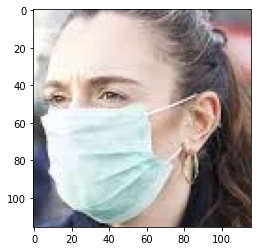

In [5]:
mask_1 = ('../input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/1008.png')

plt.imshow(imread(mask_1))
plt.show()

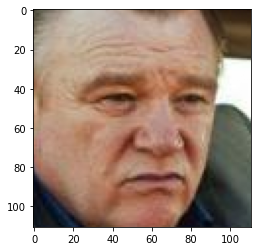

In [7]:
withoutmask_1 = ('../input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/1012.png')

plt.imshow(imread(withoutmask_1))
plt.show()

In [8]:
dim1 = []
dim2 = []

for image_filename in os.listdir('../input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask'):
    
    img = imread('../input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/'+ image_filename)
    
    d1,d2,color = img.shape
    
    dim1.append(d1)
    dim2.append(d2)
    

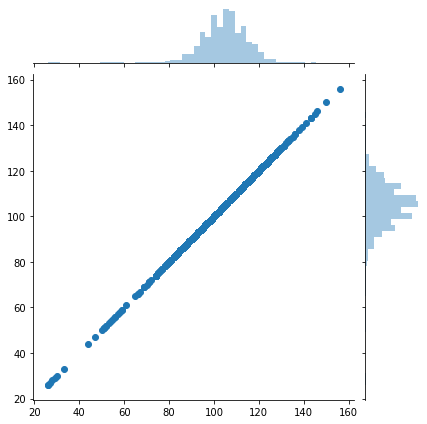

In [9]:
sns.jointplot(dim1,dim2)
plt.show()

In [10]:
np.mean(dim1) , np.mean(dim2)

(104.544, 104.544)

In [11]:
image_shape = (104,104,3)

# Data Augmentation 

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              rescale=1/255)

In [14]:
image_gen.flow_from_directory('../input/face-mask-12k-images-dataset/Face Mask Dataset/Train')

Found 10000 images belonging to 2 classes.


In [15]:
image_gen.flow_from_directory('../input/face-mask-12k-images-dataset/Face Mask Dataset/Test')

Found 992 images belonging to 2 classes.


In [16]:
image_gen.flow_from_directory('../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation')

Found 800 images belonging to 2 classes.


# Training 

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 102, 102, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 51, 51, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [21]:
batch_size = 16

In [22]:
train_image_gen = image_gen.flow_from_directory('../input/face-mask-12k-images-dataset/Face Mask Dataset/Train',
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 10000 images belonging to 2 classes.


In [23]:
val_image_gen = image_gen.flow_from_directory('../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation',
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 800 images belonging to 2 classes.


In [24]:
test_image_gen = image_gen.flow_from_directory('../input/face-mask-12k-images-dataset/Face Mask Dataset/Test',
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 992 images belonging to 2 classes.


In [25]:
train_image_gen.class_indices   # True Value

{'WithMask': 0, 'WithoutMask': 1}

In [26]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=val_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
625/625 [==============================] - 64s 102ms/step - loss: 0.1946 - accuracy: 0.9325 - val_loss: 0.1239 - val_accuracy: 0.9650
Epoch 2/20
625/625 [==============================] - 54s 87ms/step - loss: 0.1110 - accuracy: 0.9638 - val_loss: 0.0492 - val_accuracy: 0.9800
Epoch 3/20
625/625 [==============================] - 54s 86ms/step - loss: 0.0907 - accuracy: 0.9688 - val_loss: 0.0506 - val_accuracy: 0.9837
Epoch 4/20
625/625 [==============================] - 54s 87ms/step - loss: 0.0772 - accuracy: 0.9732 - val_loss: 0.0525 - val_accuracy: 0.9787


In [27]:
metrics = pd.DataFrame(model.history.history)

In [28]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.194604,0.9325,0.123909,0.96500
1,0.110988,0.9638,0.049184,0.98000
2,0.090683,0.9688,0.050615,0.98375
3,0.077195,0.9732,0.052533,0.97875


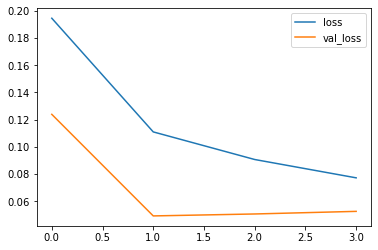

In [30]:
metrics[['loss','val_loss']].plot()
plt.show()

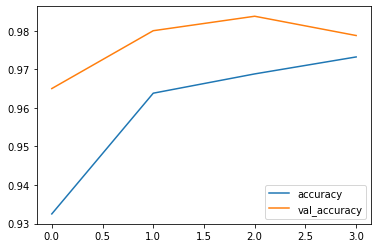

In [33]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

# Prediction 

In [34]:
model.evaluate_generator(test_image_gen)

[0.08542251586914062, 0.9737903475761414]

In [35]:
from tensorflow.keras.preprocessing import image
pred_probabilities = model.predict_generator(test_image_gen)

In [38]:
predictions = pred_probabilities > 0.5

In [41]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       483
           1       0.96      0.98      0.97       509

    accuracy                           0.97       992
   macro avg       0.97      0.97      0.97       992
weighted avg       0.97      0.97      0.97       992



In [42]:
confusion_matrix(test_image_gen.classes,predictions)

array([[463,  20],
       [  9, 500]])

# Good Job .. 97% Accuracy 
---------------------------------------------------------------------------------------------------------------------------

# Checking Model

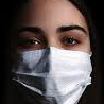

In [44]:
# 1

img = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/1767.png'

my_image = image.load_img(img,target_size=image_shape)

my_image

In [45]:
type(my_image)

PIL.Image.Image

In [46]:
my_image = image.img_to_array(my_image)
type(my_image)

numpy.ndarray

In [47]:
my_image.shape

(104, 104, 3)

In [48]:
my_image = np.expand_dims(my_image, axis=0)

In [49]:
my_image.shape

(1, 104, 104, 3)

In [50]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [51]:
# True Values

test_image_gen.class_indices

{'WithMask': 0, 'WithoutMask': 1}

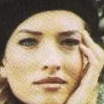

In [52]:
# 2


img = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1148.png'

my_image = image.load_img(img,target_size=image_shape)

my_image

In [53]:
my_image = image.img_to_array(my_image)

my_image = np.expand_dims(my_image, axis=0)

model.predict(my_image)

array([[1.]], dtype=float32)